# 1일차 Review : 같은 문제 다시 풀어보기
---
- 학습은 10번만!

In [32]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()

In [34]:
x = iris.data
y = iris.target

In [35]:
x.shape, y.shape

((150, 4), (150,))

In [36]:
#####################
# train set / test set 분리
# 조건 1. test set size = 10%
# 조건 2. 난수 고정 random seed = 2023
#####################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2023)

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((135, 4), (135,), (15, 4), (15,))

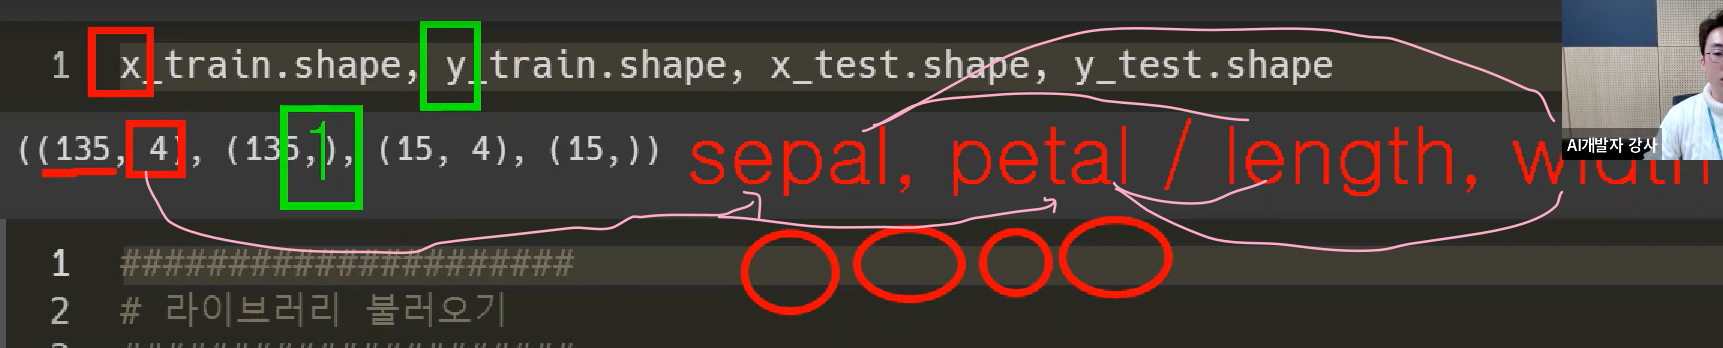

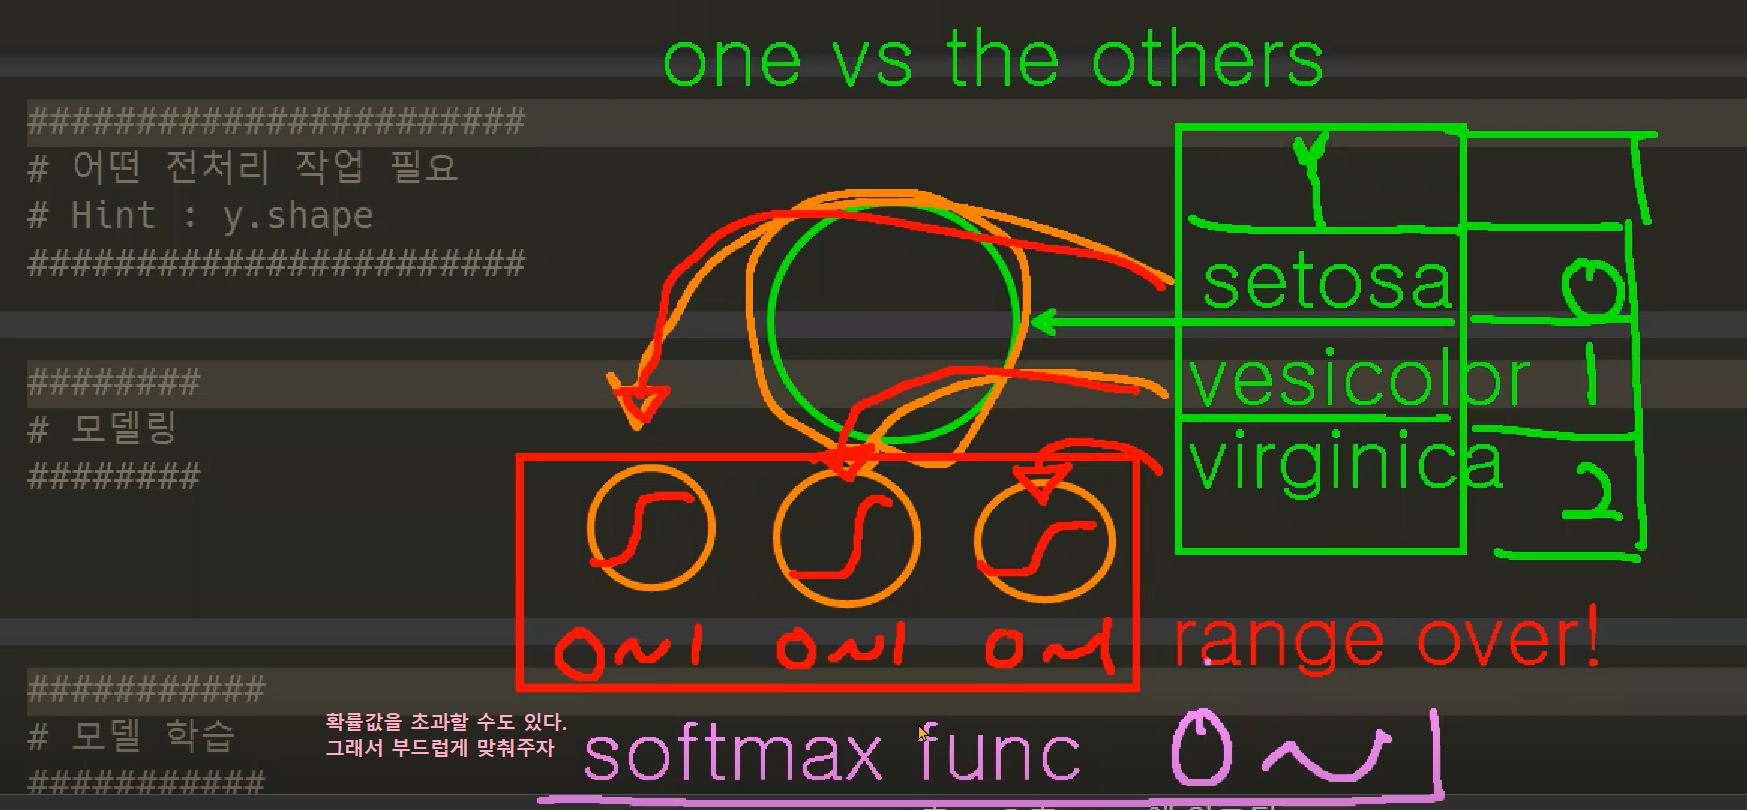

In [38]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [39]:
#######################
# 어떤 전처리 작업 필요 : one hot encoding
# Hint : y.shape
#######################
y_train

array([2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2,
       0, 0, 1])

In [40]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
import numpy as np

In [41]:
# y값에 뭐 있는지 확인
np.unique(y_train)

array([0, 1, 2])

In [42]:
# class_n에 y개수 담기
class_n = len(np.unique(y_train))

In [43]:
# y_train을 이용해서 클래스 3개인 걸 확인했고 그것을 y_train에 적용
y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)

In [44]:
y_train.shape

(135, 3)

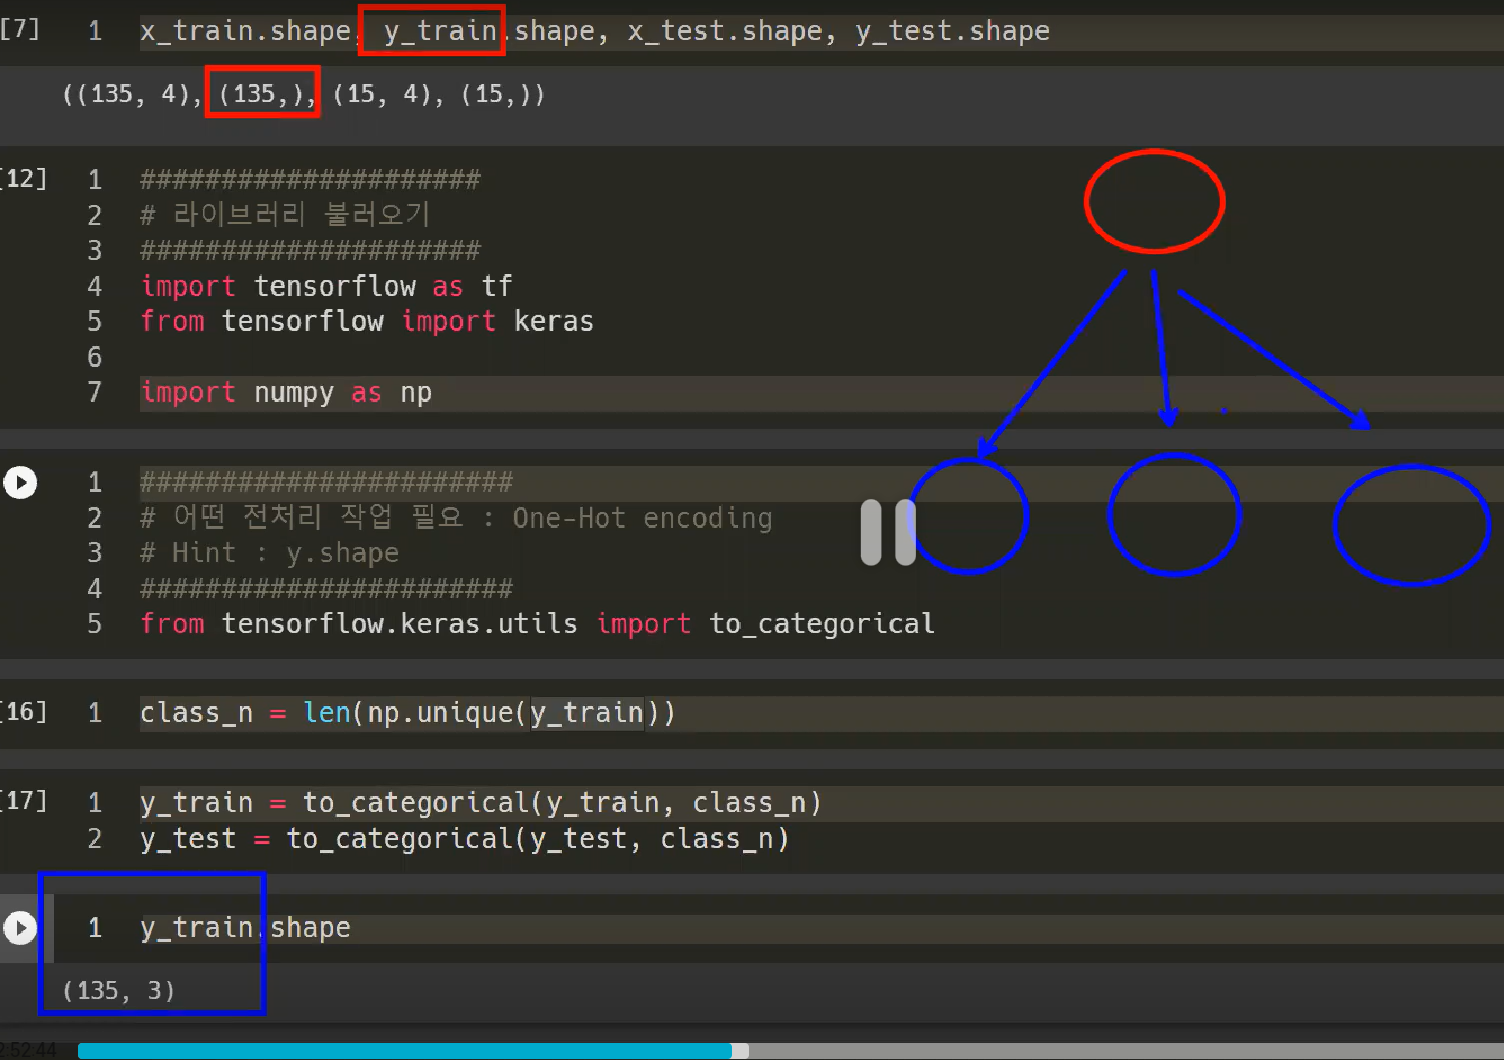

In [47]:
########
# 모델링
########
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()
# 3. 레이어 조립
model.add(keras.layers.Input(shape=(4,))) # 세팔 페탈의 렝스, 위드스
model.add(keras.layers.Dense(3, activation='softmax'))
# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [48]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
5/5 [==============================] - 1s 5ms/step - loss: 1.2728 - accuracy: 0.6815
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 1.2291 - accuracy: 0.6815
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.1863 - accuracy: 0.6815
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1478 - accuracy: 0.6815
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1056 - accuracy: 0.6815
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0686 - accuracy: 0.6815
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0301 - accuracy: 0.6815
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9933 - accuracy: 0.6815
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9595 - accuracy: 0.6815
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9251 - accuracy: 0.6815


In [49]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)


1/1 [==============================] - 0s 126ms/step


In [50]:
y_pred[:10]

array([[0.15847823, 0.08876671, 0.75275505],
       [0.30806103, 0.09191238, 0.6000266 ],
       [0.31045452, 0.10873354, 0.5808119 ],
       [0.07143929, 0.06886629, 0.8596945 ],
       [0.21358366, 0.08576379, 0.70065254],
       [0.19636524, 0.10578371, 0.697851  ],
       [0.26707014, 0.11854704, 0.61438286],
       [0.29995373, 0.10986435, 0.5901819 ],
       [0.849789  , 0.04602375, 0.10418726],
       [0.2075653 , 0.10746627, 0.6849684 ]], dtype=float32)

In [51]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

# 히든 레이어 추가하여 모델링! (Functional API)
---
- 조건
    - 히든 레이어 2개를 추가하여 다시 모델링!
    - 히든 레이어 노드 수 : 32
    - 히든 레이어 activation = 'relu'

In [58]:
x_train.shape, y_train.shape

((135, 4), (135, 3))

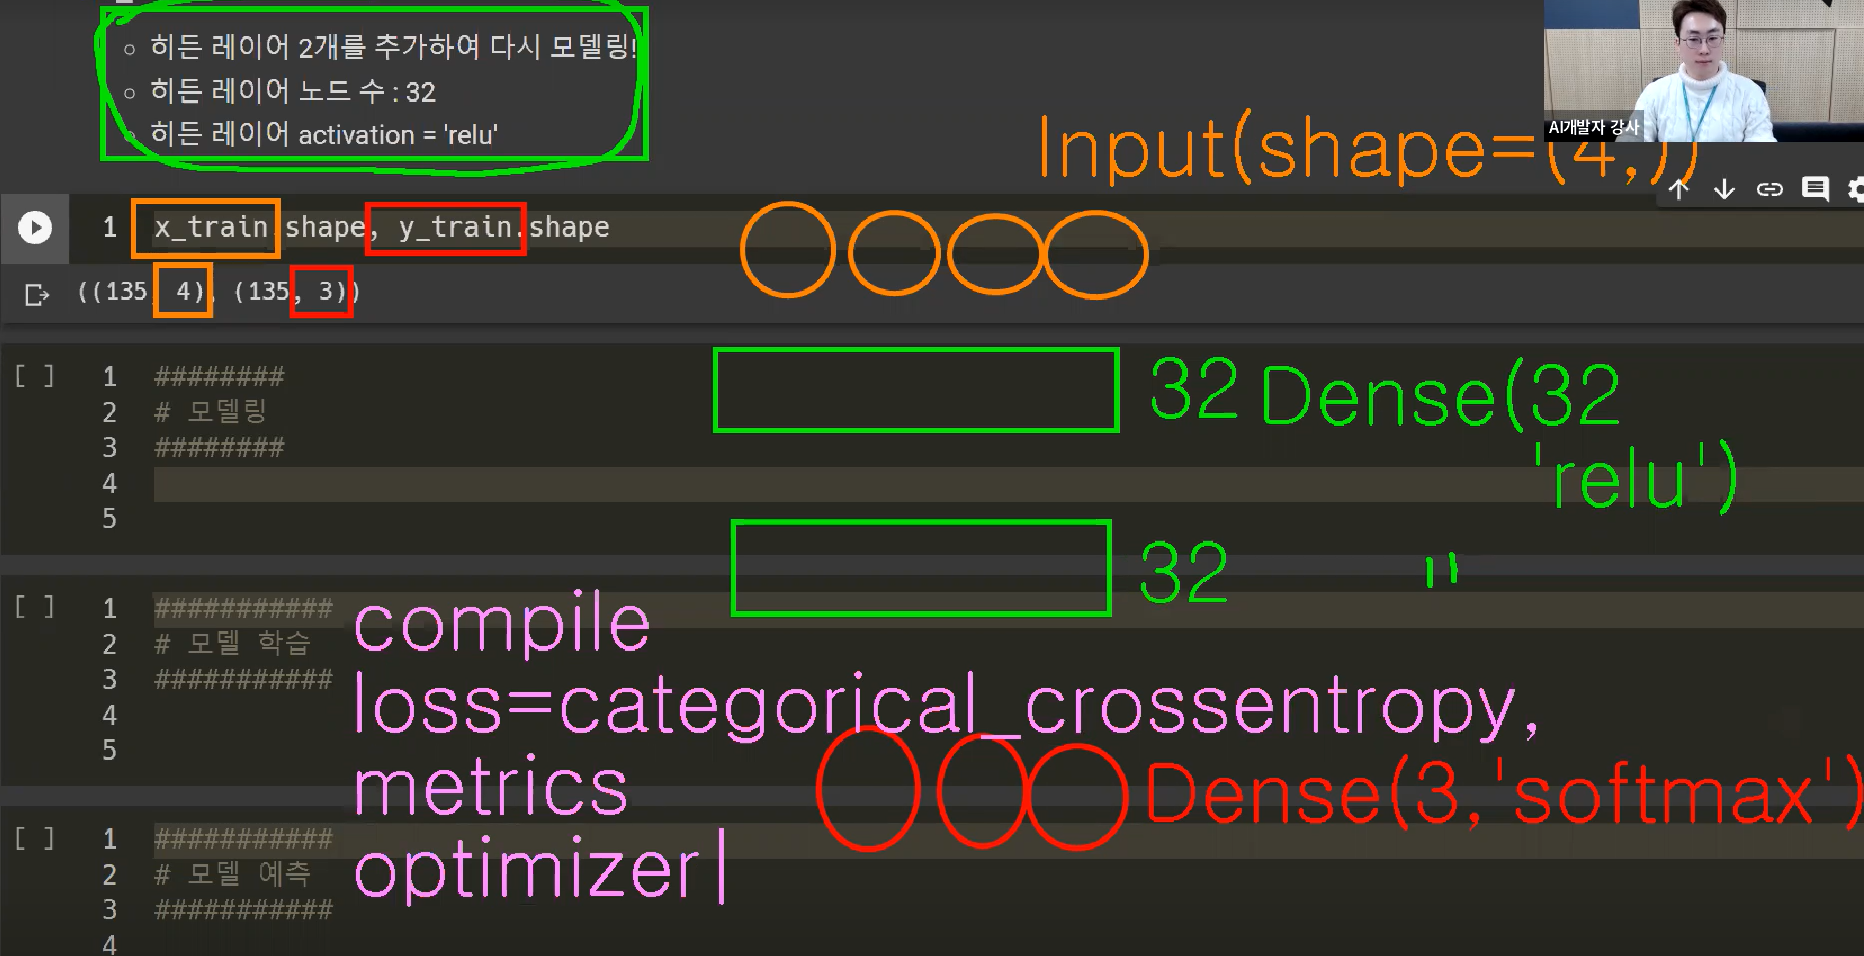

In [52]:
########
# 모델링
########
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 모델 조립
model.add(keras.layers.Input(shape=(4,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# 양념
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [53]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
5/5 [==============================] - 1s 3ms/step - loss: 1.9409 - accuracy: 0.3185
Epoch 2/10
5/5 [==============================] - 0s 38ms/step - loss: 1.6315 - accuracy: 0.3185
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 1.4384 - accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 1.3182 - accuracy: 0.3481
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1.2338 - accuracy: 0.3407
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 1.1427 - accuracy: 0.3407
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0847 - accuracy: 0.3407
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0406 - accuracy: 0.3407
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0091 - accuracy: 0.3481
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 0.9808 - accuracy: 0.5333


In [54]:
###########
# 모델 예측
###########

y_pred = model.predict(x_test)

1/1 [==============================] - 0s 377ms/step


In [55]:
y_pred[:10]

array([[0.24925998, 0.30089334, 0.44984663],
       [0.28458133, 0.3347803 , 0.38063848],
       [0.2909147 , 0.3263023 , 0.382783  ],
       [0.23396567, 0.2834945 , 0.4825397 ],
       [0.26732373, 0.32887942, 0.40379688],
       [0.2595931 , 0.30570617, 0.4347007 ],
       [0.28561378, 0.30978426, 0.40460196],
       [0.2908535 , 0.3225631 , 0.38658336],
       [0.39246416, 0.35564756, 0.2518883 ],
       [0.28415042, 0.32711163, 0.38873795]], dtype=float32)

In [57]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

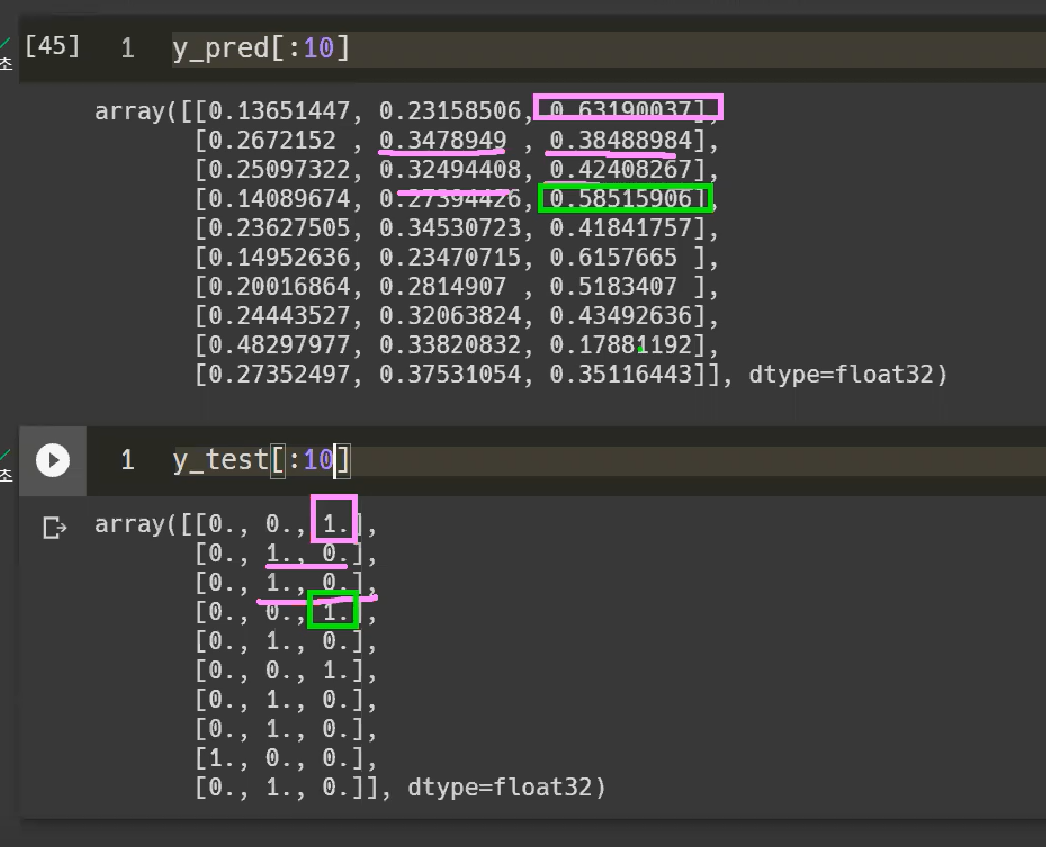